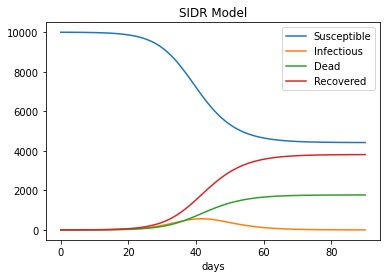

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


# gesamte Bevölkerung, N.
N = 10000
#Anfängliche Anzahl infizierter und geretteter Probanden (immunisiert, geheilt, verstorben).
I0, D0, R0 = 1, 0, 0
# Alle anderen sind wahrscheinlich betroffen.
S0 = N - I0 - R0 - D0
# Beta die Kontaktrate, Mu Heilung und Theta Tod
beta, mu, theta = 0.6, 0.28, 0.13
# das Zeitraster für das Diagramm (in Tagen)
t = np.linspace(0, 90, 90)

def deriv(y, t, N, beta, mu, theta):
    S, I, D, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - (mu+theta) * I
    dDdt = theta * I
    dRdt = mu * I
    return dSdt, dIdt, dDdt, dRdt

# Anfangsvektor
y0 = S0, I0, D0, R0
# Start der Integration von Differentialgleichungen
ret = odeint(deriv, y0, t, args=(N, beta,mu, theta))

S, I, D, R = ret.T

# Plot von Kurven 
plt.title("SIDR Model")
plt.plot(t,S,label= "Susceptible")
plt.plot(t,I,label="Infectious")
plt.plot(t,D,label="Dead")
plt.plot(t,R,label="Recovered")
plt.xlabel("days")
plt.legend()
plt.show()